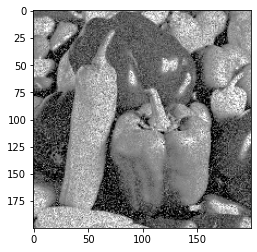

In [7]:
import cv2
import numpy as np
from src.utils import show_image, add_noise_sp, add_noise_g
from src.tgv import alg3, tgv_denoise_pd
import matplotlib.pyplot as plt


def to_float(image_raw):
    return image_raw.astype(np.float32) / 255 - 0.5


def to_uint8(image_f):
    return ((image_f + 0.5) * 255).astype(np.uint8)


def show_image(image):
    plt.gray()
    plt.imshow(image)
    plt.show()


image_raw = cv2.imread("data/peppers.png", cv2.IMREAD_GRAYSCALE)
image_f = to_float(image_raw)
image_f = add_noise_g(image_f, std=0.3)
show_image(image_f)

In [8]:
%%capture

# ROF model based denoising with ALG3
image_denoised_alg3 = alg3(image_f, lambda_tv=16.0, n_it=300, alpha=0.05, L=12)

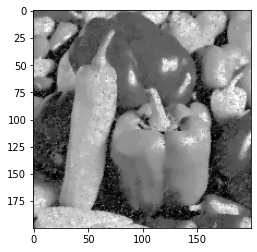

In [9]:
show_image(image_denoised_alg3)

In [10]:
%%capture

# second-order TGV based denoising
image_denoised_pd = tgv_denoise_pd(image_f, lambda_tv=0.03, n_it=500, alpha=0.05, L=12)

KeyboardInterrupt: 

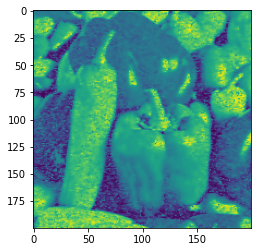

In [ ]:
show_image(image_denoised_pd)